**ML6 Assignment 26**

In [ ]:
In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
>50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.


In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:

train_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)


In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status','occupation','relationship', 'race', 'sex', 
              'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
train_set.replace(' ?', np.nan).dropna().shape 

(30162, 15)

In [9]:
test_set.replace(' ?', np.nan).dropna().shape

(15060, 15)

In [10]:
train_no_missing = train_set.replace(' ?', np.nan).dropna()
test_no_missing = test_set.replace(' ?', np.nan).dropna()

In [11]:
train_no_missing.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
test_no_missing.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [13]:
test_no_missing['wage_class'] = test_no_missing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [16]:
#Checking the unique values from each set, we can see if they now match.

test_no_missing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
train_no_missing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

**Applying Ordinal Encoding to Categoricals**

In [18]:
#First, combine them together into a single dataset.

In [19]:
combined_set = pd.concat([train_no_missing, test_no_missing], axis = 0) # Stacks them vertically

In [20]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education_num     45222 non-null int64
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null object
wage_class        45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [22]:
##Next, if the feature is not already numerical, we need to encode it as one. We can use pandas Categorical codes for this task.

In [21]:
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer


In [23]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null int8
fnlwgt            45222 non-null int64
education         45222 non-null int8
education_num     45222 non-null int64
marital_status    45222 non-null int8
occupation        45222 non-null int8
relationship      45222 non-null int8
race              45222 non-null int8
sex               45222 non-null int8
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null int8
wage_class        45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


In [24]:
combined_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [25]:
# Now split these back into their original train/test sizes

In [27]:
final_train = combined_set[:train_no_missing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_no_missing.shape[0]:] # Past the last initial training set row


In [28]:
#We can now finally start playing around with XGBoost.

**Initial Model Setup and Grid Search**

In [29]:
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

In [ ]:
#Now import the libraries we will need to do grid search for XGBoost.

In [30]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [31]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [32]:
# Run our grid search with 5-fold cross-validation and see which parameters perform the best

In [33]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [34]:
optimized_GBM.grid_scores_

[mean: 0.86685, std: 0.00239, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86659, std: 0.00371, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86725, std: 0.00317, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86178, std: 0.00317, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.85953, std: 0.00251, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86158, std: 0.00239, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85611, std: 0.00330, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.85525, std: 0.00323, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.85714, std: 0.00320, params: {'max_depth': 7, 'min_child_weight': 5}]

In [35]:
 ## Let’s try optimizing some other hyperparameters now to see if we can beat a mean of 86.72%
 ## accuracy. This time, we will play around with subsampling along with lowering the learning 
 ## rate to see if that helps.

In [36]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [37]:
optimized_GBM.grid_scores_

[mean: 0.86622, std: 0.00271, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.86685, std: 0.00239, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.86771, std: 0.00349, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.85999, std: 0.00307, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.86032, std: 0.00272, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.86002, std: 0.00282, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [38]:
# we have just got bit of improvement in accuracy at 86.77%

In [39]:
## we can try to optimize a little further by utilizing XGBoost’s built-in cv which allows early stopping to prevent overfitting.

**Early stopping CV**</br>
Based on the CV testing performed earlier, we want to utilize the following parameters:

Learning_rate (eta) = 0.1
Subsample, colsample_bytree = 0.8
Max_depth = 3
Min_child_weight = 1

In [40]:
## To increase the performance of XGBoost’s speed through many iterations of the training set, 
## and since we are using only XGBoost’s API and not sklearn’s anymore, we can create 
## a DMatrix. This sorts the data initially to optimize for XGBoost when it builds trees, 
## making the algorithm more efficient. This is especially helpful when you have a very large
##number of training examples. To create a DMatrix:

In [41]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [42]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [43]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
458,0.129898,0.005536,0.116521,0.000994
459,0.129965,0.005315,0.116446,0.000983
460,0.129832,0.005425,0.116455,0.000975
461,0.129500,0.005550,0.116338,0.000941
462,0.129434,0.005663,0.116338,0.000875


In [44]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [45]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

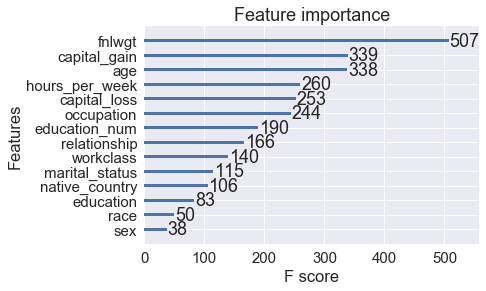

In [46]:
xgb.plot_importance(final_gb)

In [47]:
importances = final_gb.get_fscore()
importances

{'age': 338,
 'capital_gain': 339,
 'capital_loss': 253,
 'education': 83,
 'education_num': 190,
 'fnlwgt': 507,
 'hours_per_week': 260,
 'marital_status': 115,
 'native_country': 106,
 'occupation': 244,
 'race': 50,
 'relationship': 166,
 'sex': 38,
 'workclass': 140}

In [48]:
##so here, fnlwgt, capital gain and age has higher importace and sex ,race has mininal importance

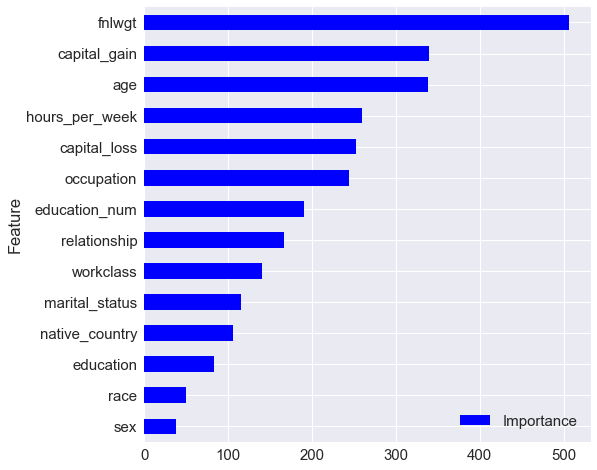

In [52]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'blue')

**Analyzing Performance on Test Data**

In [53]:
testdmat = xgb.DMatrix(final_test)

In [54]:
## let’s use sklearn’s accuracy metric to see how well we did on the test set.

In [55]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.00303194, 0.2071426 , 0.3024281 , ..., 0.8288712 , 0.16432679,
       0.7885478 ], dtype=float32)

In [56]:
## Setting probability t0 0.5

In [57]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([0., 0., 0., ..., 1., 0., 1.], dtype=float32)

In [58]:
##Now we can calculate our accuracy.

In [59]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.8686586985391767, 0.13134130146082335)

In [60]:
##Our final accuracy is 86.86%, or a 13.13% error rate. We beat our goal by a whole percentage point!